In [ ]:
from google.colab import files
uploaded=files.upload()

Saving WorldCupPlayers.csv to WorldCupPlayers.csv


In [ ]:
import pandas as pd
import os
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency
from sklearn.metrics import mutual_info_score
import networkx as nx
import scipy.stats as stats
import plotly.graph_objects as go
from tabulate import tabulate


In [ ]:

print("Fichiers disponibles dans le repertoire courant :")
for file in os.listdir():
  print(f"- {file}")

df = pd.read_csv('WorldCupPlayers.csv', sep=',')


Fichiers disponibles dans le repertoire courant :
- .config
- WorldCupPlayers.csv
- sample_data


In [ ]:
print("\nColonnes de DataFrame WorldCupsPlayers :")
print(df.columns.tolist())

print("\nAperçu des premières lignes du DataFrame :")
df.head()


Colonnes de DataFrame WorldCupsPlayers :
['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up', 'Shirt Number', 'Player Name', 'Position', 'Event']

Aperçu des premières lignes du DataFrame :


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [ ]:
print(f"La taille de DataFrame : {df.shape[0]} lignes et {df.shape[1]} colonnes")

La taille de DataFrame : 37784 lignes et 9 colonnes


le DataFrame contient  37 784 lignes et 9 colonnes.

In [ ]:
print("Info générales sur le DataFrame:")
df.info()

Info générales sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


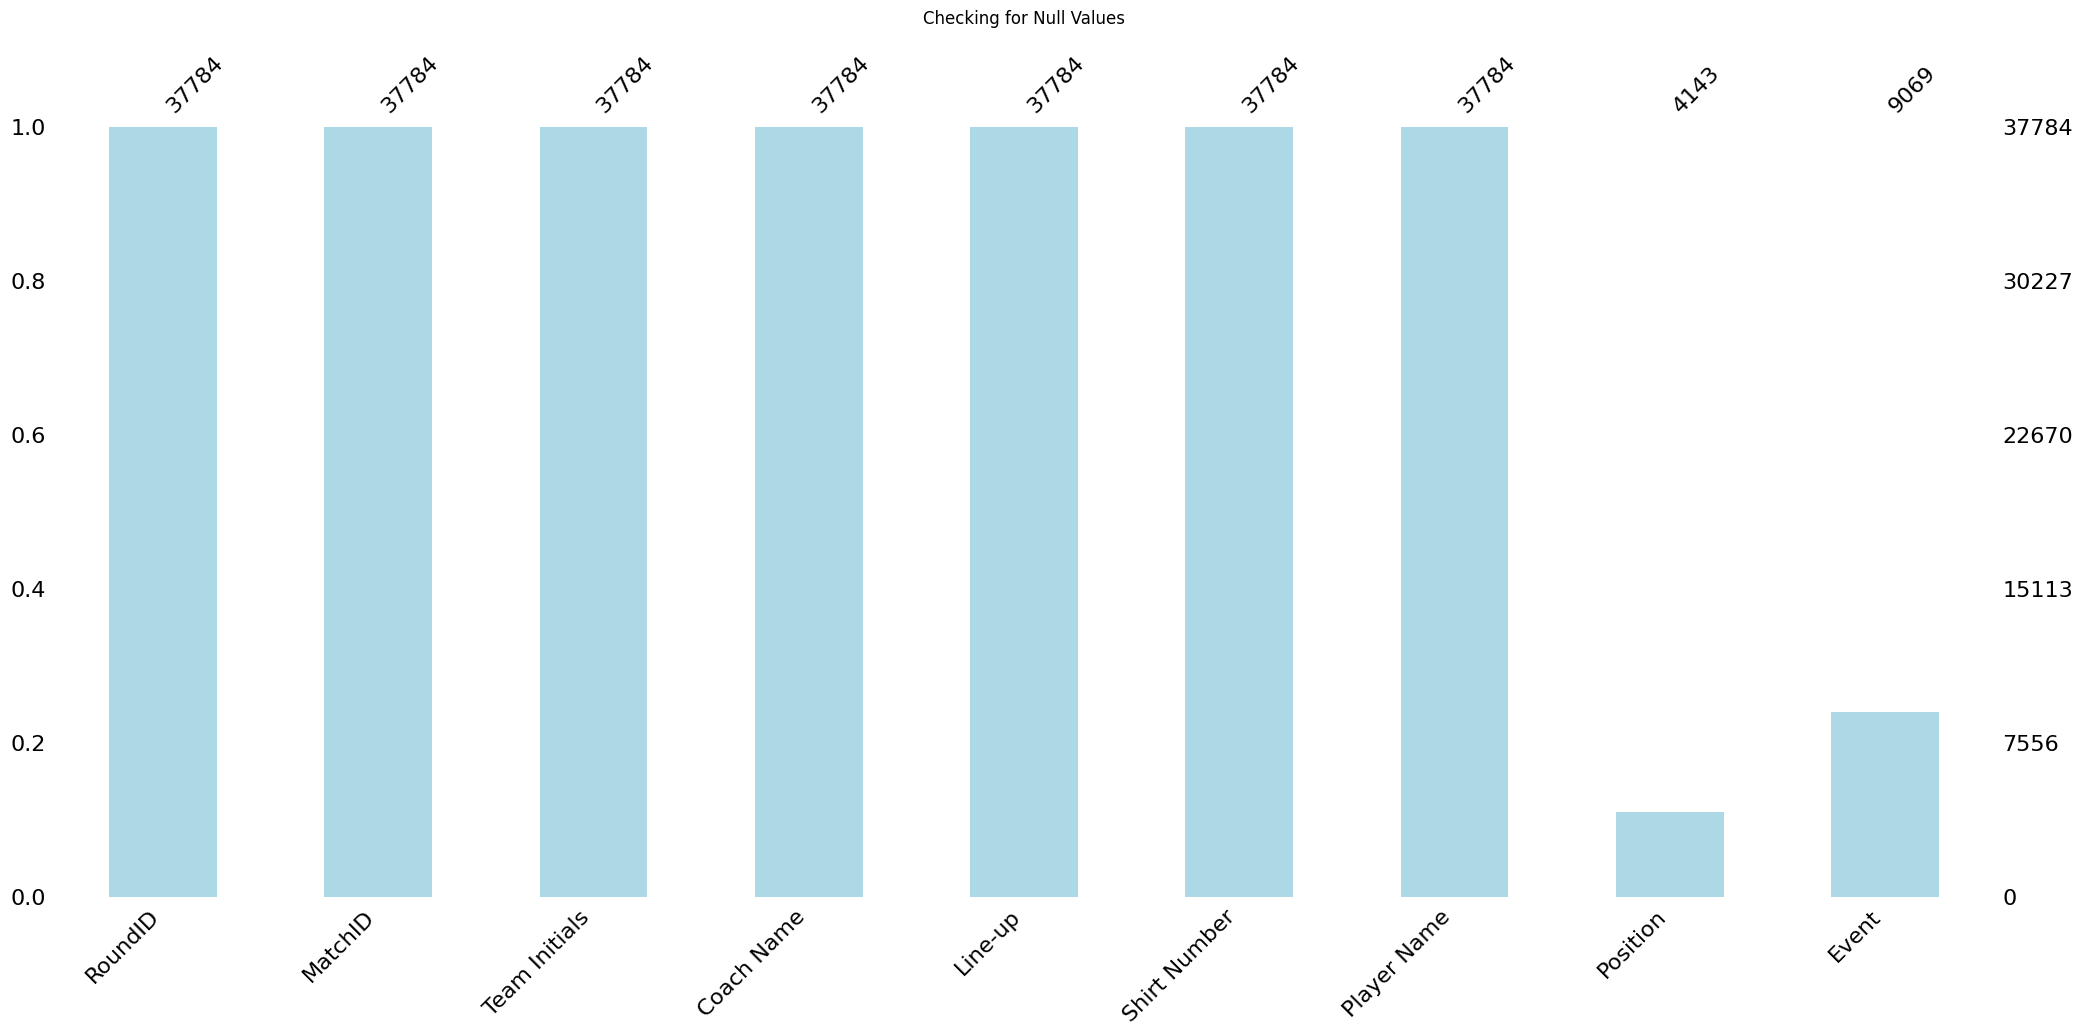

In [ ]:
plt.figure(figsize=(10,8))
msno.bar(df,color='lightblue')
plt.title("Checking for Null Values\n")
plt.show()

In [ ]:
df_copy=df.copy()
df_copy['MatchID']=df_copy['MatchID'].astype('category')
df_copy['RoundID']=df_copy['RoundID'].astype('category')
print("Statistiques descriptives du DataFrame :")
df_copy.describe()

Statistiques descriptives du DataFrame :


,Shirt Number
count,37784.000000
mean,10.726022
std,6.960138
min,0.000000
25%,5.000000
50%,11.000000
75%,17.000000
max,23.000000


Shirt Number : Les valeurs sont comprises entre 0 et 23, avec une moyenne d'environ 10,73 et un écart type de 6,96

Moyenne de 10,73 :

La moyenne est légèrement supérieure à 10, ce qui indique que les numéros de maillot sont en général proches de 10, une valeur typique dans les équipes sportives.
Cela suggère qu'il y a peut-être une majorité de numéros inférieurs à 20, avec quelques numéros plus élevés qui augmentent légèrement la moyenne.
Médiane de 11 :

La médiane est la valeur centrale, ce qui signifie que la moitié des joueurs ont un numéro de maillot inférieur ou égal à 11.
Dans de nombreux sports, les numéros de 1 à 11 sont souvent attribués aux titulaires ou aux joueurs qui occupent les positions clés sur le terrain. Par exemple, dans le football (soccer), les numéros de 1 à 11 sont généralement associés aux positions traditionnelles (gardien, défenseurs, milieux, attaquants).
La médiane très proche de la moyenne indique que la distribution des numéros de maillot est assez symétrique, sans valeurs extrêmes très influentes.
Quartile inférieur (Q1) de 5,0 :

Le premier quartile (Q1) signifie que 25 % des joueurs ont un numéro de maillot inférieur ou égal à 5.
Cela correspond souvent aux joueurs de positions défensives dans de nombreux sports. Par exemple, dans le football, les numéros 1 à 5 sont souvent portés par des gardiens ou des défenseurs centraux.
Quartile supérieur (Q3) de 17,0 :

Le troisième quartile (Q3) signifie que 75 % des joueurs ont un numéro de maillot inférieur ou égal à 17.
Cela implique que la majorité des joueurs portent des numéros de maillot compris entre 1 et 17, ce qui est cohérent avec les pratiques courantes dans de nombreux sports d'équipe.
Les numéros supérieurs à 17 sont moins fréquents, ce qui pourrait indiquer des joueurs remplaçants, des numéros réservés à des joueurs spécifiques, ou des rôles particuliers dans l’équipe.
Distribution des valeurs :
La moyenne (10,73) et la médiane (11,0) très proches montrent que la distribution des numéros de maillot est relativement équilibrée, sans grande asymétrie.
Les quartiles (Q1 = 5,0 et Q3 = 17,0) suggèrent que la majorité des numéros sont concentrés dans un intervalle raisonnable, ce qui est typique dans les sports où les numéros de maillot varient entre 1 et 30.
Il est probable que les numéros les plus élevés (au-delà de 17) soient attribués à des remplaçants ou à des joueurs spécifiques. Ces valeurs pourraient légèrement étendre la distribution vers la droite (numéros plus grands), mais elles ne créent pas d'extrêmes suffisamment importants pour rendre la distribution asymétrique.

In [ ]:
df_copy=df.copy()
df_copy['MatchID']=df_copy['MatchID'].astype('category')
df_copy['RoundID']=df_copy['RoundID'].astype('category')
cols=df_copy.select_dtypes(include=['category','object']).columns
plotnumber=1
for i in range(len(cols)):
  if plotnumber<=len(cols):
    top_values=df_copy[cols[i]].value_counts().nlargest(10).index
    df_top=df_copy[df_copy[cols[i]].isin(top_values)]
    frequence_absolue=df_top[cols[i]].value_counts()
    frequence_relative=df_top[cols[i]].value_counts(normalize=True)*100
    mode=df_top[cols[i]].mode()
    print(f"\nle mode de {cols[i]} :\n {mode[0]}")
    print(f"\nFréquence absolue de {cols[i]} :\n {frequence_absolue}")
    print(f"\nFréquence relative de {cols[i]} :\n {frequence_relative}")
  plotnumber+=1



le mode de RoundID :
 255931

Fréquence absolue de RoundID :
 RoundID
255931      2208
43950100    2208
249722      2207
97410100    2207
1014        2112
            ... 
462            0
429            0
418            0
405            0
97410600       0
Name: count, Length: 101, dtype: int64

Fréquence relative de RoundID :
 RoundID
255931      11.960997
43950100    11.960997
249722      11.955580
97410100    11.955580
1014        11.440953
              ...    
462          0.000000
429          0.000000
418          0.000000
405          0.000000
97410600     0.000000
Name: proportion, Length: 101, dtype: float64

le mode de MatchID :
 300186460

Fréquence absolue de MatchID :
 MatchID
300186460    92
300186462    92
300186474    92
300186503    92
300186488    92
             ..
1407          0
1408          0
1415          0
1418          0
300186515     0
Name: count, Length: 836, dtype: int64

Fréquence relative de MatchID :
 MatchID
300186460    10.0
300186462    10.0
300186

<ipython-input-12-95bb783ca588>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

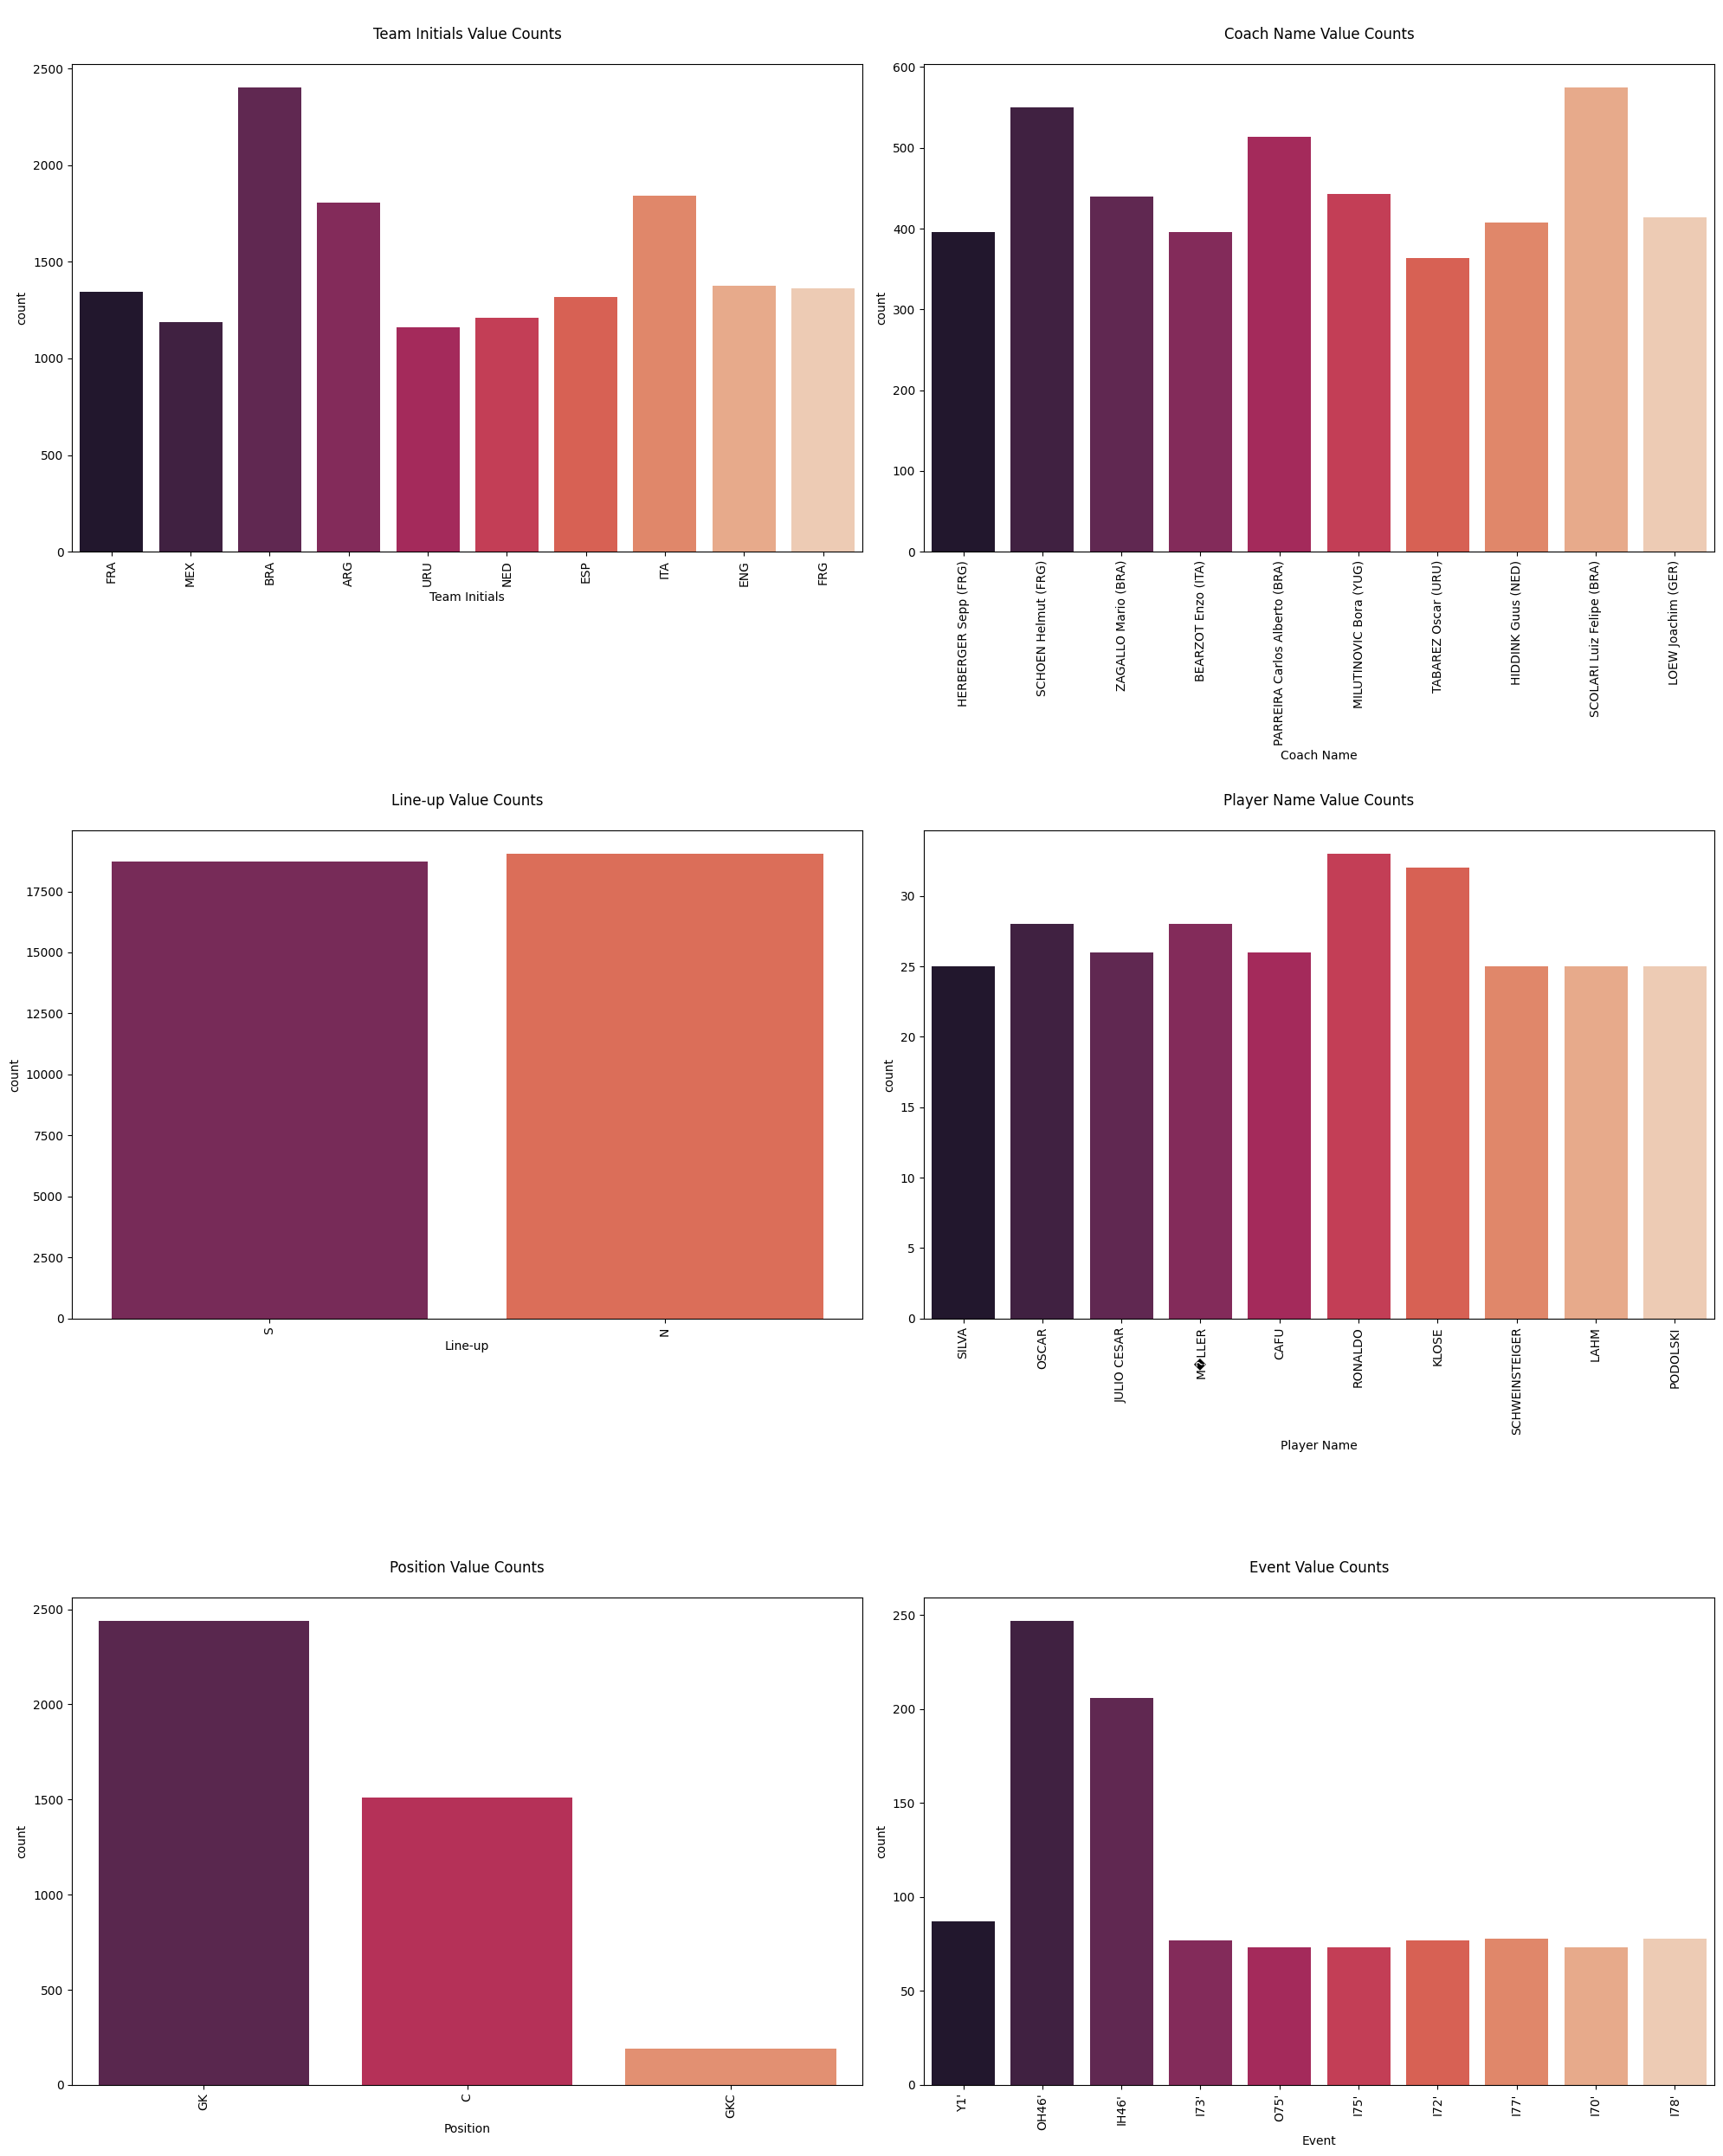

In [ ]:
cols=df.select_dtypes(include=['object']).columns
plotnumber=1
plt.figure(figsize=(20,25))
for i in range(len(cols)):
  if plotnumber <= len(cols):
    ax=plt.subplot(3,2,plotnumber)
    top_values = df[cols[i]].value_counts().nlargest(10).index
    df_top = df[df[cols[i]].isin(top_values)]
    sns.countplot(x=cols[i],data=df_top,ax=ax,palette='rocket')
    plt.title(f"\n{cols[i]} Value Counts\n")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
  plotnumber+=1
plt.tight_layout()
plt.show()

In [ ]:
cols=df.select_dtypes(include=['object']).columns
plotnumber=1
for i in range(len(cols)):
  if plotnumber<=len(cols):
    top_values=df[cols[i]].value_counts().nlargest(10).index
    df_top=df[cols[i]].isin(top_values)
    col_count=df[cols[i]][df_top].value_counts()
    fig=px.pie(values=col_count,names=col_count.index,color_discrete_sequence = px.colors.sequential.matter_r, width =800, height = 600, hole=0.5)
    fig.update_traces(textinfo='percent+label')
    fig.show()

  plotnumber+=1

In [ ]:
skewness=df['Shirt Number'].skew()
print(f"Asymétrie : {skewness}")
kurtosis=df['Shirt Number'].kurt()
print(f"Kurtosis : {kurtosis}")

Asymétrie : 0.03209711840776647
Kurtosis : -1.226726454018132


La kurtosis (ou applatissement) de -1.2267 indique que la distribution est plat par rapport à une distribution normale (kurtosis de 0).
Implications :
Une kurtosis négative indique une distribution leptokurtique, ce qui signifie que la distribution a des queues plus légères que celles d'une distribution normale. Cela veut dire qu'il y a moins de valeurs extrêmes ou de valeurs aberrantes.
En pratique, cela suggère que la plupart des numéros de maillot se concentrent autour de la moyenne, et il n'y a pas de forte présence de valeurs très éloignées de la moyenne (ni trop petites ni trop grandes).
Les joueurs ayant des numéros de maillot sont donc plus susceptibles d'avoir des numéros qui se situent dans une plage étroite plutôt que d'avoir de nombreux numéros extrêmes.

Dans l'ensemble, les deux mesures montrent que la variable Shirt Number a une distribution stable et prévisible, conforme à ce qui est généralement attendu dans le contexte des numéros de maillot attribués aux joueurs dans les sports d'équipe.

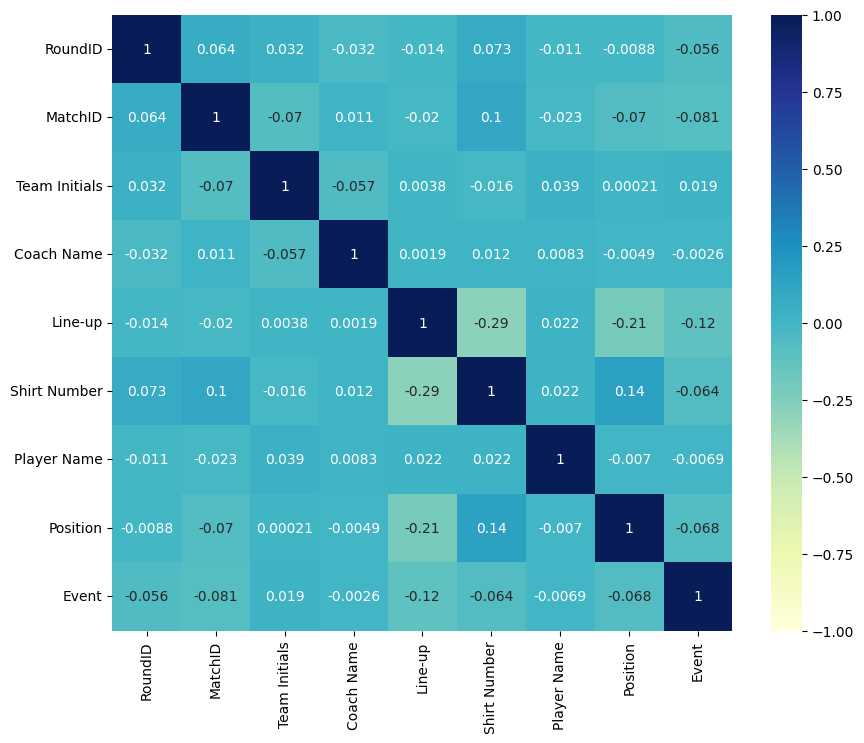

In [ ]:
encoding=LabelEncoder()
df_enocded=df.copy()
for col in df_enocded.select_dtypes(include=['object']):
  df_enocded[col]=encoding.fit_transform(df_enocded[col])
corr_matrix=df_enocded.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix , annot=True , cmap='YlGnBu',vmin=-1,vmax=1)
plt.show()

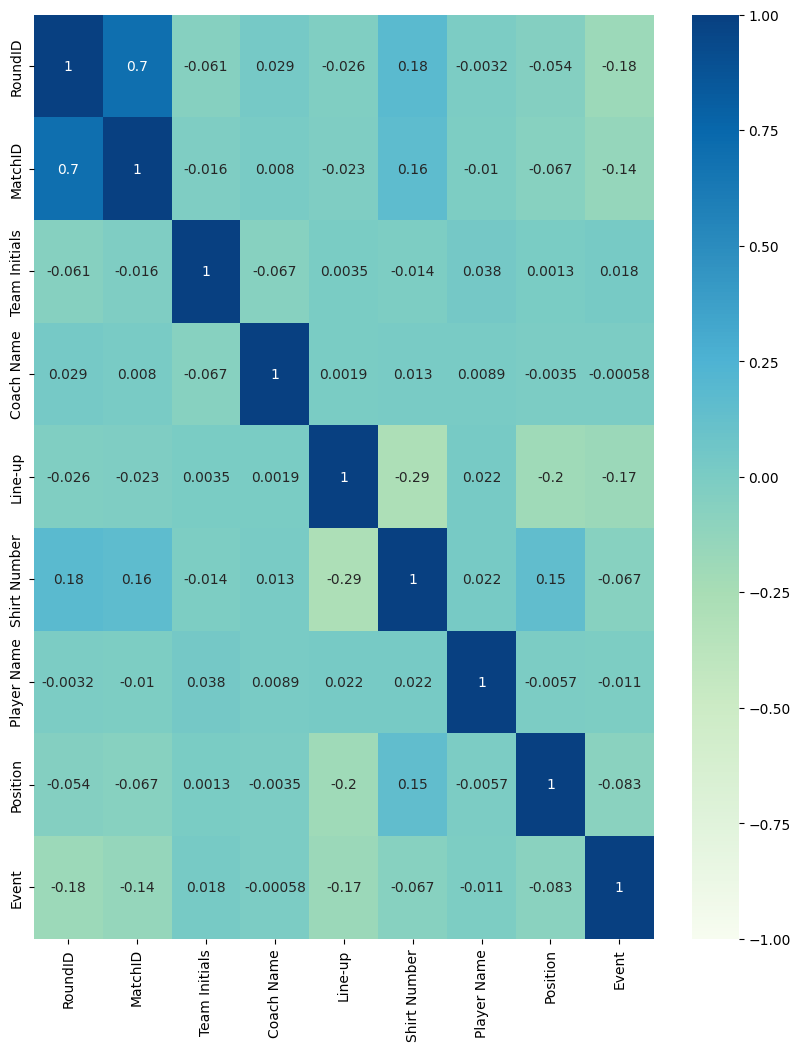

In [ ]:
encoding=LabelEncoder()
df_encoded=df.copy()
for col in df_encoded.select_dtypes(include=['object']):
  df_encoded[col]=encoding.fit_transform(df_encoded[col])
corr_matrix=df_encoded.corr(method='spearman')
plt.figure(figsize=(10,12))
sns.heatmap(corr_matrix,annot=True ,cmap= 'GnBu',vmin=-1,vmax=1)
plt.show()

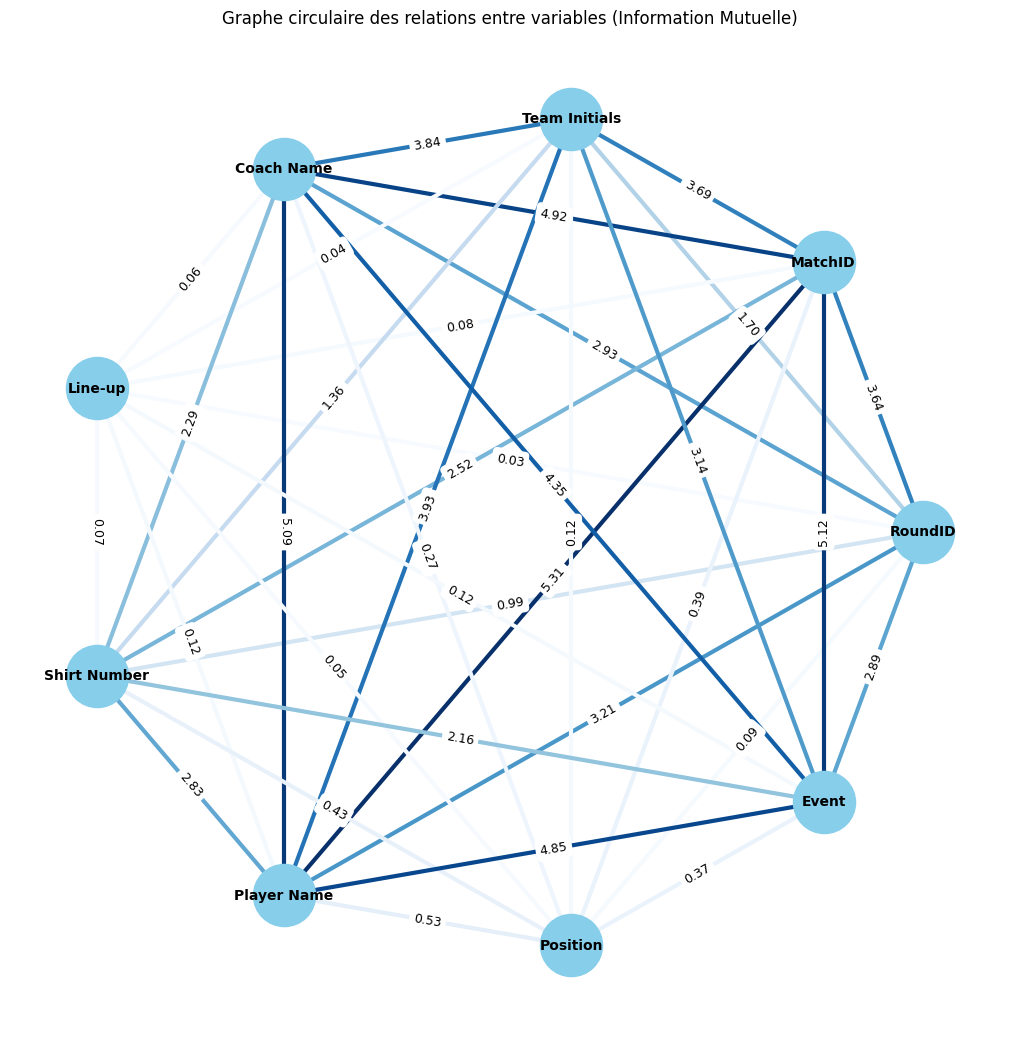

In [ ]:
cols=df.select_dtypes(include=['object','int64','float64']).columns
df=df.dropna(subset=cols)
G=nx.Graph()
for col in cols:
  G.add_node(col)
for i in range(len(cols)):
  for j in range(len(cols)):
    if i!=j:
      mi_score=mutual_info_score(df[cols[i]],df[cols[j]])
      if mi_score>0:
        G.add_edge(cols[i],cols[j],weight=mi_score)
plt.figure(figsize=(10,10))
pos=nx.circular_layout(G)
edges=G.edges(data=True)
weight=[edge[2]["weight"] for edge in edges]
nx.draw(G,pos,with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight='bold',
        edge_color=weight, edge_cmap=plt.cm.Blues, width=3)
edge_labels={(edge[0],edge[1]):f'{edge[2]["weight"]:.2f}' for edge in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
plt.title("Graphe circulaire des relations entre variables (Information Mutuelle)")
plt.show()

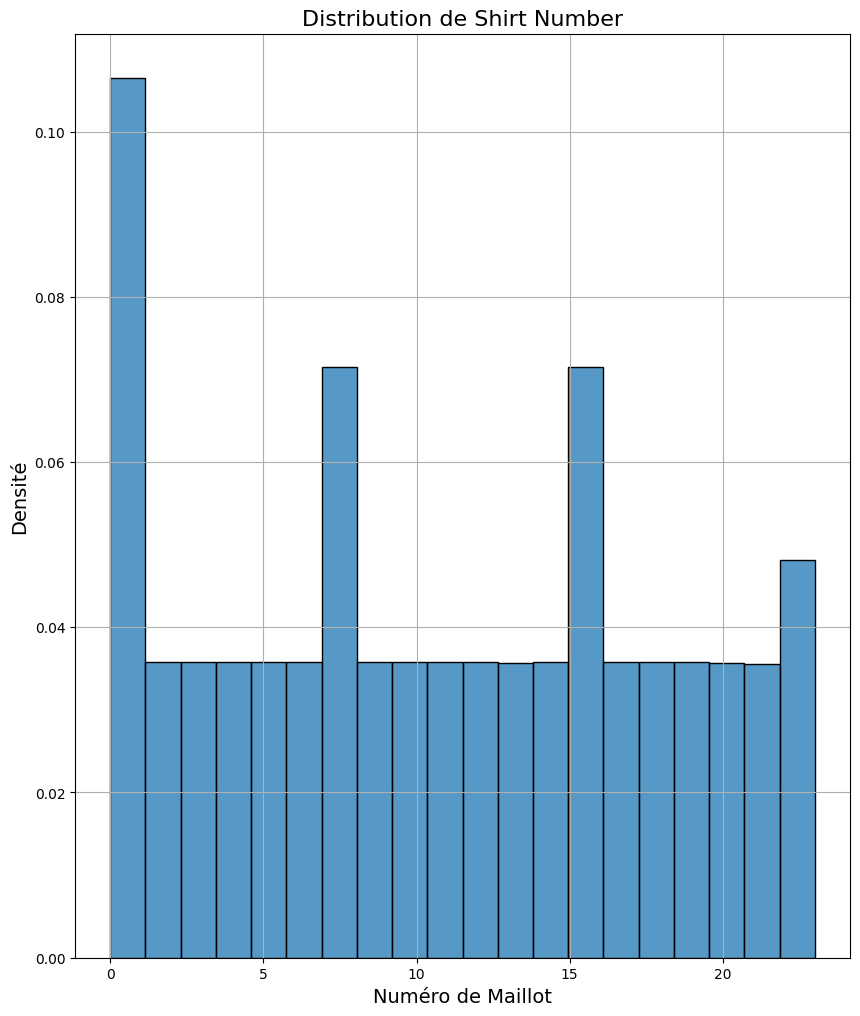

In [ ]:
plt.figure(figsize=(10,12))
sns.histplot(data=df,x='Shirt Number',bins=20, stat='density')
plt.title("Distribution de Shirt Number", fontsize=16)
plt.xlabel("Numéro de Maillot", fontsize=14)
plt.ylabel("Densité", fontsize=14)
plt.grid()
plt.show()

Les numéros de maillot semblent être distribués de manière irrégulière, avec des pics aux alentours des numéros 1, 5, 10, 15, et 20.
La densité de distribution est plus élevée pour certains numéros de maillot (notamment les numéros 1, 10, et 15), ce qui suggère que ces numéros sont peut-être plus courants ou plus populaires.
Les barres montrent également une répartition relativement uniforme pour d'autres numéros de maillot, mais avec des creux à des intervalles réguliers.

<ipython-input-26-0557cfa9cd51>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df,x=df['Shirt Number'],bins=20)


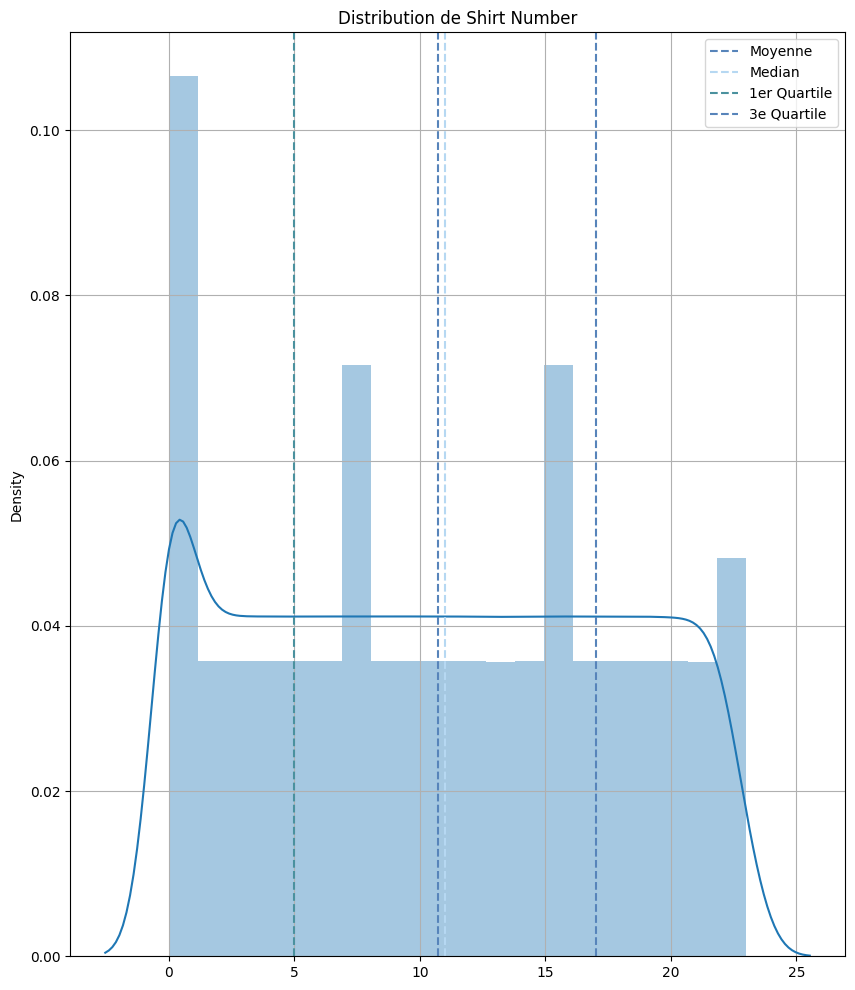

In [ ]:
plt.figure(figsize=(10,12))
sns.distplot(df,x=df['Shirt Number'],bins=20)
plt.title("Distribution de Shirt Number")
plt.axvline(df['Shirt Number'].mean(),color='#5784BA',linestyle='--', label='Moyenne')
plt.axvline(df['Shirt Number'].median(),color='#B6D8F2',linestyle='--', label='Median')
plt.axvline(df['Shirt Number'].quantile(q=(0.25)),color='#4A919E',linestyle='--', label='1er Quartile')
plt.axvline(df['Shirt Number'].quantile(q=(0.75)),color='#5784BA',linestyle='--', label='3e Quartile')
plt.legend()
plt.grid()
plt.show()


La valeur de skewness (0.032) étant très proche de zéro, cela veut dire que l'asymétrie à droite est presque imperceptible. En d'autres termes, la distribution est quasi symétrique, avec juste un petit "tirage" vers les numéros de maillot plus grands.

distribution a des queues plus courtes et moins épaisses par rapport à une distribution normale (qui a un kurtosis de 0).

Cela indique que les valeurs extrêmes (très petites ou très grandes) sont moins fréquentes. En d'autres termes, il y a moins de valeurs dans les extrêmes de la distribution (peu de joueurs ont des numéros de maillot très petits ou très grands).

Kurtose plate : Cela signifie également que la distribution est plus aplatie au centre. Les données sont donc plus dispersées autour de la moyenne, et il y a moins de pics ou de concentration de valeurs autour de la moyenne.

Visuellement, on peut conclure que la distribution des numéros de maillot multimodale (avec plusieurs pics distincts). Cela pourrait indiquer qu'il existe plusieurs groupes de joueurs préférant certains numéros de maillot, comme 1, 5, 10, 15, et 20, peut-être pour des raisons culturelles ou tactiques dans les équipes.
Le fait que la distribution soit quasi-symétrique mais étalée (platykurtique) signifie qu'il n'y a pas de biais fort dans les choix de numéros, mais que les joueurs se répartissent entre plusieurs numéros de manière équilibrée.

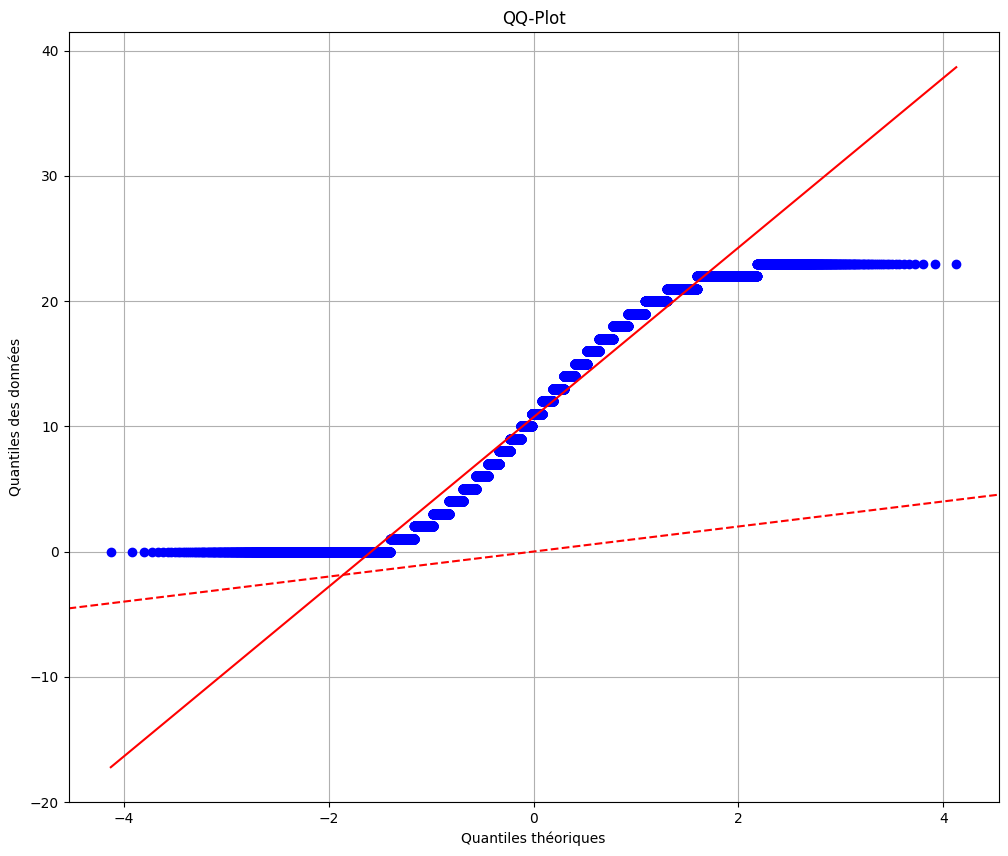

In [ ]:
plt.figure(figsize=(12,10))
stats.probplot(df['Shirt Number'],dist='norm',plot=plt)
plt.title('QQ-Plot')
plt.xlabel('Quantiles théoriques')
plt.ylabel('Quantiles des données')
plt.grid(True)
plt.axline((0,0),slope=1,linestyle='--',color='red')
plt.show()

In [ ]:
cols=df.select_dtypes(include=['object']).columns
plotnumber=1
chi2_matrix=pd.DataFrame(index=cols , columns=cols)
pval_matrix=pd.DataFrame(index=cols,columns=cols)
for i in range(len(cols)):
  for j in range(len(cols)):
    if i!=j and plotnumber<=len(cols):
      tab=pd.crosstab(df[cols[i]],df[cols[j]])
      chi2 , p , dof , excepted=chi2_contingency(tab)
      chi2_matrix.iloc[i,j]=chi2
      pval_matrix.iloc[i,j]=p
labels=chi2_matrix.columns
source=[]
target=[]
value=[]
customdata=[]
for i in range(len(chi2_matrix.columns)):
  for j in range(i+1,len(chi2_matrix.columns)):
    if chi2_matrix.iloc[i,j] is not None:
      source.append(i)
      target.append(j)
      value.append(chi2_matrix.iloc[i,j])
      customdata.append((chi2_matrix.iloc[i,j],pval_matrix.iloc[i,j],labels[i],labels[j]))
fig=go.Figure(go.Sankey(
    node=dict(pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels),
    link=dict(source=source , target=target , value=value , customdata=customdata,

    hovertemplate=(
        'Source : % {customdata[2]}<br>'
        'Target: %{customdata[3]}<br>'
        'Chi2: %{customdata[0]:.2f}<br>'
        'p-value: %{customdata[1]:.4f}<extra></extra>'
    ))
))
fig.update_layout(title_text="Diagramme de Sankey des Associations Chi-deux avec p-values, Source et Target", font_size=12)
fig.show()

Une valeur très élevée de la statistique du chi-deux, comme 2749877.55, suggère qu'il y a une grande différence entre les fréquences observées et attendues, ce qui indique généralement que les variables sont dépendantes (il existe une association entre elles).                                                                      Une p-valeur de 0.0 (généralement inférieure à 0.001) indique une significativité statistique très forte. Cela signifie qu'il y a très peu de chances que la relation observée entre Team Initials et Coach Name soit due au hasard.                                                                        Des degrés de liberté élevés, comme 27054, suggèrent que le test est basé sur un grand nombre d'observations, ce qui peut renforcer la confiance dans les résultats obtenus.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
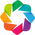

:Chord   [source,target]   (value)

In [ ]:
hv.extension('bokeh')

cols = df_copy.select_dtypes(include='object').columns
links = []

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        cont_tab = pd.crosstab(df_copy[cols[i]], df_copy[cols[j]])
        chi2, p, dof, expected = chi2_contingency(cont_tab)
        n = np.sum(cont_tab.values)
        r, k = cont_tab.shape
        tschuprow_t_value = np.sqrt(chi2 / (n * np.sqrt((k - 1) * (r - 1))))
        if tschuprow_t_value > 0:
            links.append((cols[i], cols[j], tschuprow_t_value))

links_df = pd.DataFrame(links, columns=['source', 'target', 'value'])
nodes = list(set(links_df['source']).union(set(links_df['target'])))

chord = hv.Chord((links_df, hv.Dataset(nodes, 'index')))
chord.opts(
    opts.Chord(labels='index', cmap='Category20', edge_color='source',
               node_color='index', width=600, height=600, edge_alpha=0.8,
               title="Diagramme de Chord des associations catégorielles")
)

chord


In [ ]:
cols = df.select_dtypes(include='object').columns
plotnumber = 1

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        cont_tab = pd.crosstab(df[cols[i]], df[cols[j]])
        chi2, p, dof, expected = chi2_contingency(cont_tab)
        n = np.sum(cont_tab.values)
        r, k = cont_tab.shape
        tschuprow_t_value = np.sqrt(chi2 / (n * np.sqrt((k - 1) * (r - 1))))
        print(f"T de Tschuprow de {cols[i]} et {cols[j]} est: {tschuprow_t_value}")


T de Tschuprow de Team Initials et Coach Name est: 0.6651886646114844
T de Tschuprow de Team Initials et Line-up est: 0.008513736471830008
T de Tschuprow de Team Initials et Player Name est: 0.3185336317449794
T de Tschuprow de Team Initials et Position est: 0.08768151381493822
T de Tschuprow de Team Initials et Event est: 0.20226666830013476
T de Tschuprow de Coach Name et Line-up est: 0.011358649238149592
T de Tschuprow de Coach Name et Player Name est: 0.41947439229738875
T de Tschuprow de Coach Name et Position est: 0.1387408798391296
T de Tschuprow de Coach Name et Event est: 0.30826702855464433
T de Tschuprow de Line-up et Player Name est: 0.08160576413096533
T de Tschuprow de Line-up et Position est: 0.37750552316039804
T de Tschuprow de Line-up et Event est: 0.15064975273070133
T de Tschuprow de Player Name et Position est: 0.18896920259017658
T de Tschuprow de Player Name et Event est: 0.5394428038070758
T de Tschuprow de Position et Event est: 0.21405746147378976


In [ ]:
dist_marg_shirt=df['Shirt Number'].value_counts().reset_index()
dist_marg_shirt.columns=['Shirt Number' , 'Count']
fig=go.Figure(data=[go.Table(
    header=dict(values=dist_marg_shirt.columns ,fill_color='paleturquoise',align='center'),
    cells=dict(values=[dist_marg_shirt['Shirt Number'],dist_marg_shirt['Count']],fill_color='lavender',
               align='center')

)])


fig.show()

In [ ]:
dist_marg_position=df['Position'].value_counts().reset_index()
dist_marg_position.columns=['Position','Count']
fig=go.Figure(data=[go.Table(
    header=dict(values=dist_marg_position.columns,fill_color='paleturquoise',align='center'),
    cells=dict(values=[dist_marg_position['Position'],dist_marg_position['Count']],fill_color='lavender',
               align='center')
)])
fig.show()

In [ ]:
dist_marg_event=df['Event'].value_counts().reset_index()
dist_marg_event.columns=['Event','Count']
fig=go.Figure(data=[go.Table(
    header=dict(values=dist_marg_event.columns,fill_color='paleturquoise',align='center'),
    cells=dict(values=[dist_marg_event['Event'],dist_marg_event['Count']],fill_color='lavender',
               align='center')
)])
fig.show()

In [ ]:
dist_condition_shirt=pd.crosstab(df['Team Initials'],df['Shirt Number'],normalize='index')
fig=px.imshow(dist_condition_shirt,labels=dict(x='Shirt Number',y='Team Initias',color="Proportion"),x=dist_condition_shirt.columns,y=dist_condition_shirt.index,color_continuous_scale='Viridis')
fig.update_layout(title_text='Distribution Conditionnelle des Events par Team (Normalisé par Index)')
fig.show()

In [ ]:
dist_condi_shirt_col=pd.crosstab(df['Team Initials'],df['Shirt Number'],normalize='columns')
fig=px.imshow(dist_condi_shirt_col,labels=dict(x='Shirt Number',y='Team Initials',color="Proportion"),x=dist_condi_shirt_col.columns , y=dist_condi_shirt_col.index,color_continuous_scale='Viridis')
fig.update_layout(title='Distribution Conditionnelle des Events par Team (Normalisé par Colonnes)')
fig.show()

In [ ]:
cols=df.select_dtypes(include=['int64','float64']).columns
plotnumber=1
for i in range(len(cols)):
  if plotnumber<=len(cols):
    fig=px.box(data_frame=df,x=cols[i],template = 'plotly_dark')
    fig.update_layout(title=f'Boîte à moustaches de la répartition de {cols[i]}')
  plotnumber+=1
fig.show()

In [ ]:
px.box(data_frame=df,x=df['Position'] , y=df['Shirt Number'] , color =df['Position'] , template = 'plotly_dark')


GK (Gardien de but) :
Répartition des numéros de maillot : Les numéros de maillot des gardiens de but dans cette catégorie varient entre 0 et 20.
Médiane : La ligne au milieu de la boîte représente la médiane, qui est ici autour de 12 ou 13. Cela signifie que la moitié des gardiens de but ont un numéro de maillot inférieur à 12-13, et l'autre moitié a un numéro de maillot supérieur.
Quartiles :
Le premier quartile (Q1) est autour de 5. Cela signifie que 25% des gardiens de but ont un numéro de maillot inférieur à 5.
Le troisième quartile (Q3) est autour de 17 ou 18, ce qui veut dire que 75% des gardiens de but ont un numéro de maillot inférieur à 17-18.
Whiskers :
Les whiskers (lignes verticales qui sortent de la boîte) s’étendent de 0 à environ 20. Cela montre la plage complète des numéros de maillot des gardiens.
Outliers : Il n’y a pas d'outliers visibles pour cette catégorie. Cela signifie que les numéros de maillot des gardiens de but restent relativement cohérents dans cette plage.
C (Centrale) :
Répartition des numéros de maillot : Les numéros de maillot des joueurs en position centrale varient dans une plage plus restreinte, avec une médiane plus basse.
Médiane : La médiane est environ à 5. Cela signifie que la moitié des joueurs en position centrale ont un numéro de maillot inférieur à 5, et l'autre moitié a un numéro supérieur.
Quartiles :
Le premier quartile (Q1) est proche de 1, ce qui indique que 25% des joueurs en position centrale ont un numéro de maillot inférieur à 1.
Le troisième quartile (Q3) est autour de 7, ce qui montre que 75% des joueurs centraux ont un numéro de maillot inférieur à 7.
Whiskers :
Les whiskers s’étendent jusqu’à environ 10-11, ce qui montre que la majorité des numéros de maillot des joueurs centraux se situent dans cette plage.
Outliers :
Il y a plusieurs outliers (points au-dessus des whiskers), ce qui indique que certains joueurs en position centrale ont des numéros de maillot exceptionnellement élevés (au-dessus de 10). Ces valeurs sont rares et différentes du reste du groupe. Les joueurs avec ces numéros de maillot pourraient avoir des raisons particulières (comme des numéros choisis pour des raisons personnelles ou stratégiques).
GKC (Une autre catégorie, peut-être "Gardien + Centrale") :
Répartition des numéros de maillot : Les numéros de maillot pour cette catégorie sont presque constants, car la boîte est extrêmement aplatie, ce qui signifie que la majorité des joueurs dans cette catégorie ont un numéro de maillot très similaire (autour de 0).
Médiane : La médiane est à 0, ce qui montre que la plupart des joueurs dans cette catégorie ont un numéro de maillot de 0.
Whiskers : Les whiskers sont très courts, ce qui signifie qu’il y a très peu de variation dans les numéros de maillot pour cette catégorie.
Outliers :
Il y a un outlier très éloigné en haut du graphique (vers 10-12), ce qui montre qu’un joueur dans cette catégorie a un numéro de maillot exceptionnellement élevé, ce qui le distingue des autres. Cet outlier peut être un joueur unique avec des circonstances particulières qui expliquent cette différence de numéro de maillot.

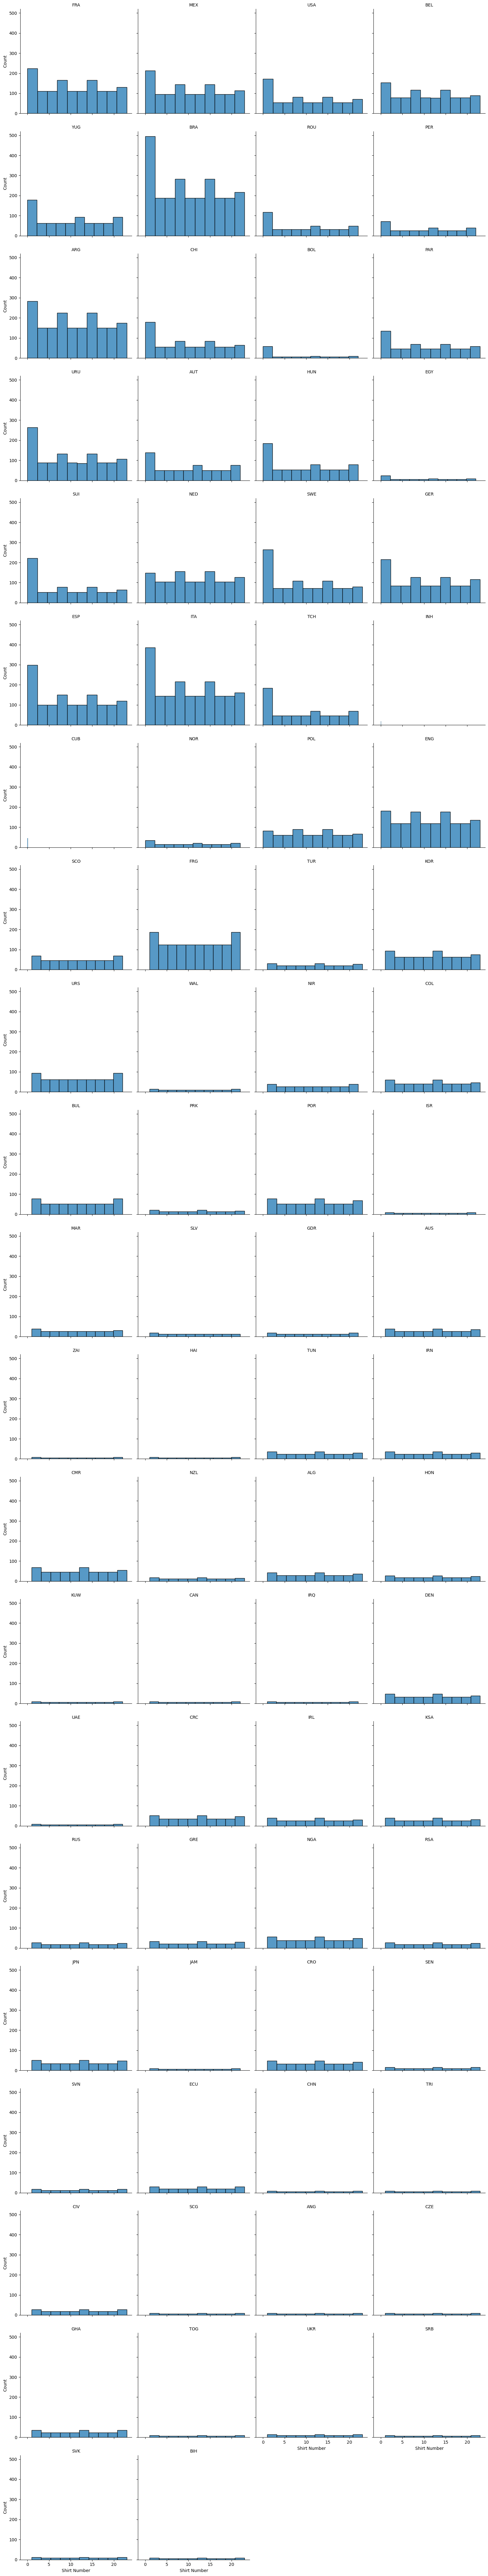

In [ ]:
df_clean = df.dropna(subset=["Team Initials", "Shirt Number"])
g = sns.FacetGrid(df_clean, col='Team Initials', col_wrap=4, height=4)
g.map(sns.histplot, 'Shirt Number', bins=10)
g.set_titles("{col_name}")
plt.show()

In [ ]:
df_copy=df.dropna(subset='Event')
fig = px.treemap(df_copy, path=['Event_Type', 'Shirt Number'], title='Treemap des joueurs par event et numéro de maillot')
fig.show()

NameError: name 'px' is not defined

Les plus grands blocs principaux correspondent à des événements qui se sont produits le plus souvent dans ton dataset. Ces événements ont une plus grande représentation visuelle car ils concernent plus de joueurs.
Les petits blocs de couleur à l'intérieur des grands blocs indiquent la répartition des joueurs (numéros de maillot) qui ont participé à cet événement particulier.
Si un numéro de maillot est représenté plusieurs fois pour un événement donné, son sous-bloc sera plus grand, ce qui indique qu'il a joué un rôle plus important ou récurrent pour cet événement.

<Axes: xlabel='Event', ylabel='Shirt Number'>

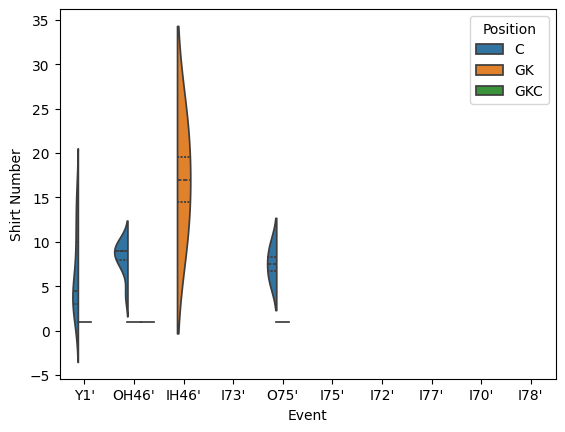

In [ ]:
df_copy=df.copy()
df_copy.dropna(subset='Event')
top_value=df_copy['Event'].value_counts().nlargest(10).index
df_top=df_copy[df_copy['Event'].isin(top_value)]
sns.violinplot(x='Event' , y='Shirt Number',hue='Position',data=df_top,split=True, inner="quartile"
)

In [ ]:
df_copy=df_copy.dropna(subset='Event_Type')
fig = px.treemap(df_copy, path=['Event_Type', 'Shirt Number'], title='Treemap des joueurs par event et numéro de maillot')
fig.show()

In [ ]:
fig = px.treemap(df_copy, path=['Team Initials', 'Coach Name'], title='Treemap des joueurs par event et numéro de maillot')
fig.show()

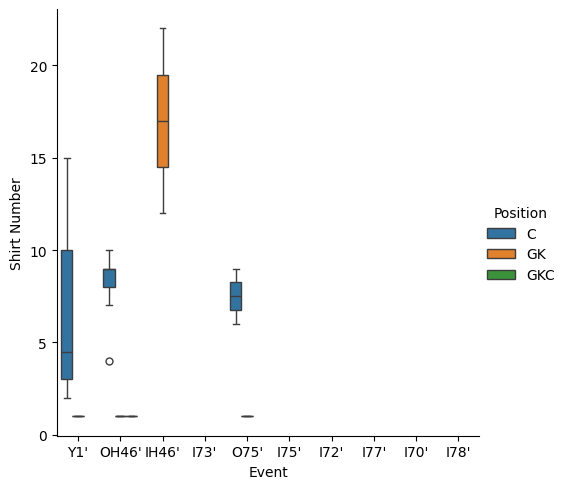

In [ ]:
df_t=df.copy()
top_values=df_t['Event'].value_counts().nlargest(10).index
df_top=df_t[df_t['Event'].isin(top_values)]
sns.catplot(data=df_top,x='Event',y='Shirt Number',hue='Position', kind='box')

<Axes: xlabel='Event', ylabel='Shirt Number'>

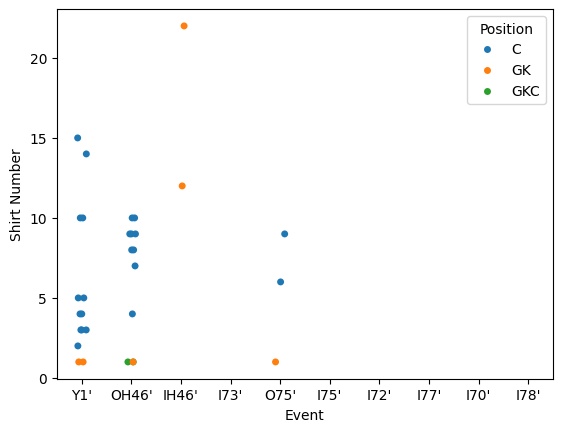

In [ ]:
df_copy=df.copy()
top_values=df_copy['Event'].value_counts().nlargest(10).index
df_top=df_copy[df_copy['Event'].isin(top_values)]
sns.stripplot(x=df_top['Event'],y=df_top['Shirt Number'] ,jitter=True,hue=df_top['Position'])